In [1]:
import numpy as np
from scipy.integrate import quad
from scipy.constants import epsilon_0
import matplotlib.pyplot as plt

Question 1

In [2]:
def integrate(fun,a,b,tol):
    print('calling function from ',a,b)
    x=np.linspace(a,b,5)
    dx=x[1]-x[0]
    y=fun(x)
    #do the 3-point integral
    i1=(y[0]+4*y[2]+y[4])/3*(2*dx)
    i2=(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/3*dx
    myerr=np.abs(i1-i2)
    if myerr<tol:
        return i2
    else:
        mid=(a+b)/2
        int1=integrate(fun,a,mid,tol/2)
        int2=integrate(fun,mid,b,tol/2)
        return int1+int2

In [3]:
def dEz_dtheta(theta,z):
    eps = 1
    sigma = 1
    R = 10
    coeff = (1/(4*np.pi*eps))*(2*np.pi*R**2*sigma)
    integrand = ((z-R*np.cos(theta))*np.sin(theta))/(R**2 + z**2 - 2*R*z*np.cos(theta))**(3/2)

    return coeff*integrand

In [4]:
z = np.linspace(0,20,1000)
Ez_mine = np.zeros(len(z))
Ez_quad = np.zeros(len(z))

for i in  range(len(z)):
    def func(theta):
        return dEz_dtheta(theta, z[i])

    Ez_mine[i] += integrate(func,0,np.pi,1e-6)
    Ez_quad[i] += quad(func,0,np.pi)[0]

calling function from  0 3.141592653589793
calling function from  0 3.141592653589793
calling function from  0 1.5707963267948966
calling function from  0 0.7853981633974483
calling function from  0 0.39269908169872414
calling function from  0 0.19634954084936207
calling function from  0 0.09817477042468103
calling function from  0.09817477042468103 0.19634954084936207
calling function from  0.19634954084936207 0.39269908169872414
calling function from  0.19634954084936207 0.2945243112740431
calling function from  0.2945243112740431 0.39269908169872414
calling function from  0.39269908169872414 0.7853981633974483
calling function from  0.39269908169872414 0.5890486225480862
calling function from  0.39269908169872414 0.4908738521234052
calling function from  0.4908738521234052 0.5890486225480862
calling function from  0.5890486225480862 0.7853981633974483
calling function from  0.5890486225480862 0.6872233929727672
calling function from  0.6872233929727672 0.7853981633974483
calling fun

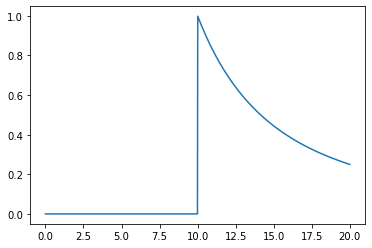

In [5]:
#plt.plot(z,Ez_quad)
plt.plot(z,Ez_mine)